In [2]:
import numpy as np
import math
from numpy import linalg as LA
import networkx as nx
np.random.seed(42)

# Program to create two moon dataset

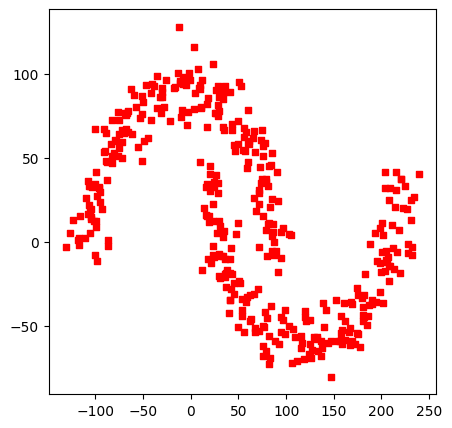

In [3]:
# Function for creating datapoints in the form of a circle
def PointsInCir1(r,n=100):        # To generate upper half moon
  return [[math.cos(math.pi/n*x)*r+np.random.normal(-10,10),
           math.sin(math.pi/n*x)*r+np.random.normal(-10,10)]
          for x in range(1,n+1)]

def PointsInCir2(r,n=100):        # To generate lower half moon
 return [[math.cos(-math.pi/n*x)*r+np.random.normal(-10,10)+130,
          math.sin(-math.pi/n*x)*r+np.random.normal(-10,10)+50]
         for x in range(1,n+1)]
x=[]
for item in PointsInCir1(100,200):
  x.append(item)
for item in PointsInCir2(100,200):
  x.append(item)
x=np.array(x)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(x[:,0],x[:,1],s=15,color='red',marker="s")
plt.show()

# Ceating graph for two concentric circle dataset

### This function takes data and number of neighbous as input and generates a graph from data. First, it computes Euclidean distance between the data points. Then, nearest k neighbours are connected through edges to generate the graph.

In [4]:
def build_graph(k,x):
  distance = []
  wts = []
  ng = []
  for row0 in x:
    for row in x:
      # distance.append(euclidean_distance(row0, row))
      distance.append(np.linalg.norm(row0- row))
    indices = np.argsort(distance)
    distance.sort()
    wts.append(distance[1:k+1])
    ng.append(indices[1:k+1].tolist()) # k nearest neighbor corresponding to every data point
    distance=[]

  plt.title(f'Neighbours={k}')
  for i in range(x.shape[0]):
    plt.scatter(x[i][0],x[i][1])
  for i in range(x.shape[0]):
    point_1 = x[i]
    for j in range(k):
      point_2 = x[ng[i][j]]
      x_point = [point_1[0],point_2[0]]
      y_point = [point_1[1],point_2[1]]
      plt.plot(x_point,y_point)
  plt.show()
  adj = np.zeros([len(x),len(x)])
  for i in range(len(adj)):
    for item in ng[i]:
      adj[i][item]=1 # Adjacency matrix
  G = nx.from_numpy_array(adj) # Graph from matrix
  # nx.draw(G, node_size = 5)

  return G

### This function takes graph as input and computes the eigenvalues and eigenvectors. It returns the eigenvector corresponding to the sencond smallest eigenvector.

In [8]:
def eigenmaps(graph,x):
  G = graph
  Adj_mat = nx.adjacency_matrix(G).todense() # Adjacency matrix
  # Adj_mat = np.array(A2.todense())
  Degree_mat = np.diag([G.degree[node] for node in G.nodes()])
  # D2 = np.diag(D2)
  Lap_mat = Degree_mat - Adj_mat
  eigenvalues, eigenvectors = LA.eig(Lap_mat)
  eigenvectors = np.real(eigenvectors)
  # print(np.real(eigenvalues))

  pos = np.where(eigenvalues == np.partition(eigenvalues, 1)[1]) # the second smallest eigenvalues
  labels = eigenvectors[:,pos[0][0]].copy()
  # vectors.append(eigenvectors[:,pos[0][0]])

  for ind,i in enumerate(labels):
    if i>=0:
      labels[ind]=0
    else:
      labels[ind]=1

  return labels

### Here we perform spectral clustering using partition method. We partition the values in the eigenvector corresponding to second smallest eigenvector into two classes.

# Spectral clustering: Performed using two techniques. First is partition approach and second is by using KMeans clustering algorithm

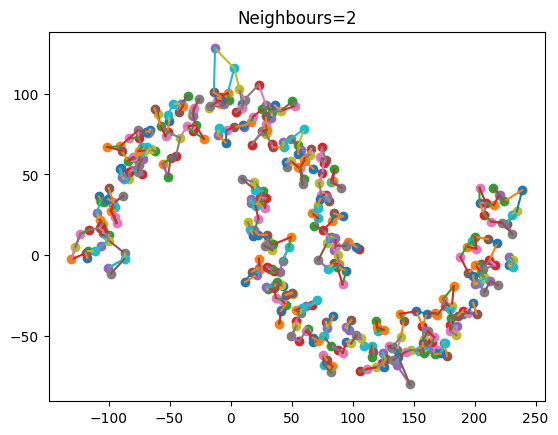

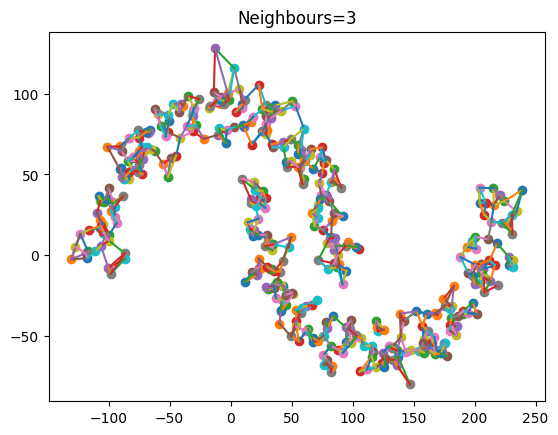

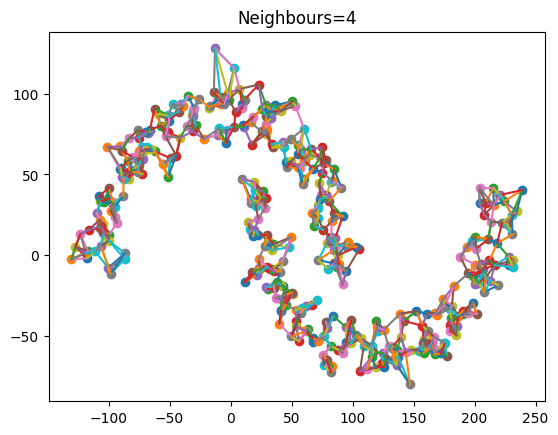

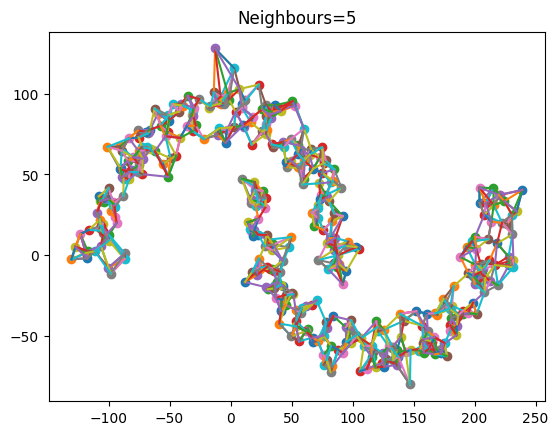

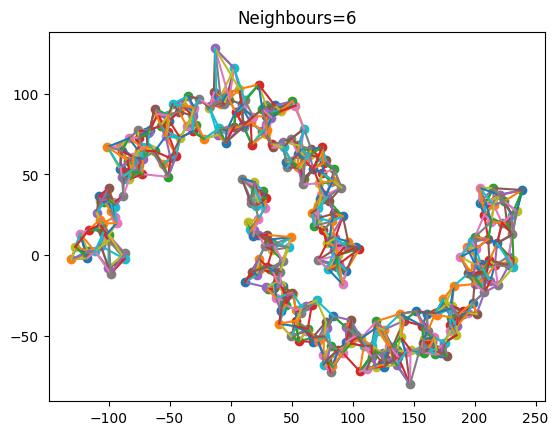

In [ ]:
k_values = np.arange(2,8)
y_pred = []   # array to store the predictions for each k neighbour graph
# vectors = []
for k in k_values:
  G = build_graph(k,x)
  y = eigenmaps(G,x)
  y_pred.append(y)


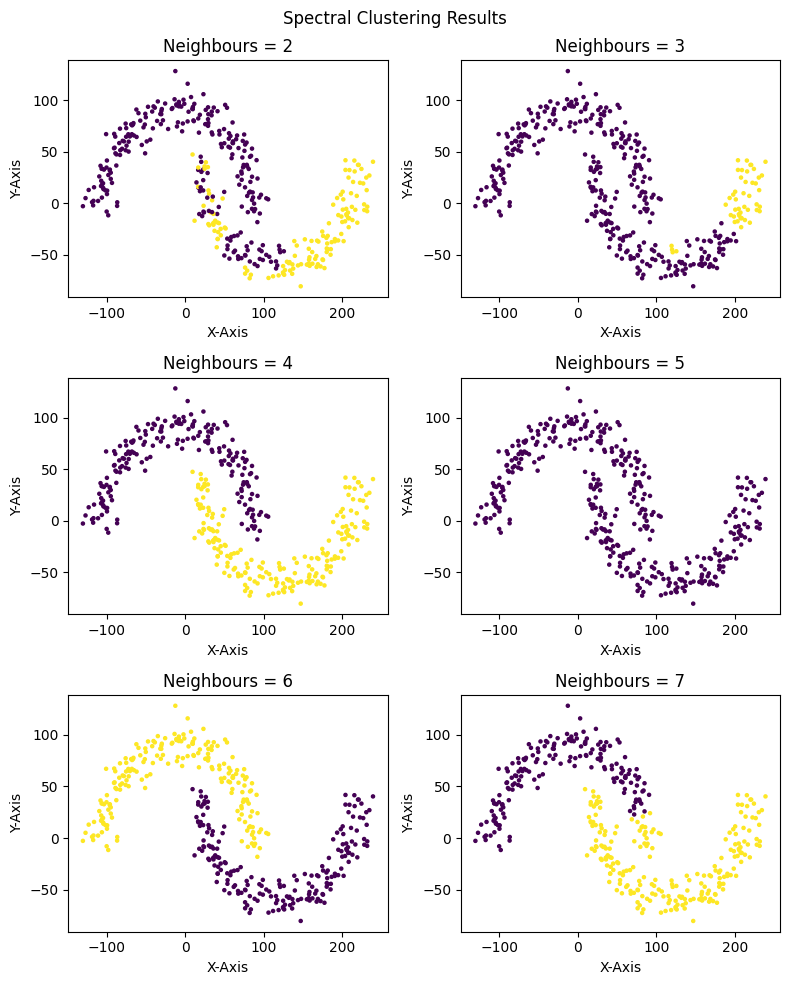

In [ ]:
r = math.ceil(len(k_values))
fig, axes = plt.subplots(r//2, 2, figsize=(8, 10))
fig.suptitle("Spectral Clustering Results")

# Iterate through different values of k
for i, j in enumerate(k_values):
    row = i // 2  # Determine the row of the subplot
    col = i % 2   # Determine the column of the subplot
   # Scatter plot the data points with colors representing clusters
    ax = axes[row, col]
    # print(row,col)
    ax.scatter(x[:, 0], x[:, 1], c=y_pred[i], cmap='viridis', s= 5)
    ax.set_title(f'Neighbours = {j}')
    ax.set_xlabel('X-Axis')
    ax.set_ylabel('Y-Axis')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Spectral clustering using *KMeans*. Here we perform clustering using KMeans clustering algorithm.

In [ ]:
from sklearn.cluster import KMeans
def kmeans_spectral_clustering(graph,x):
  G = graph
  Adj_mat = nx.adjacency_matrix(G).todense() # Adjacency matrix
  # Adj_mat = np.array(A2.todense())
  Degree_mat = np.diag([G.degree[node] for node in G.nodes()])
  # D2 = np.diag(D2)
  Lap_mat = Degree_mat - Adj_mat
  eigenvalues, eigenvectors = LA.eig(Lap_mat)
  eigenvectors = np.real(eigenvectors)

  sorted_indices = np.argsort(eigenvalues)
  sorted_eval = eigenvalues[sorted_indices]
  sorted_evec = eigenvectors[:,sorted_indices]
  second_evec = sorted_evec[:,1].real

  kmeans = KMeans(2, random_state = 10)
  labels = kmeans.fit_predict(second_evec.reshape(-1,1))

  return labels

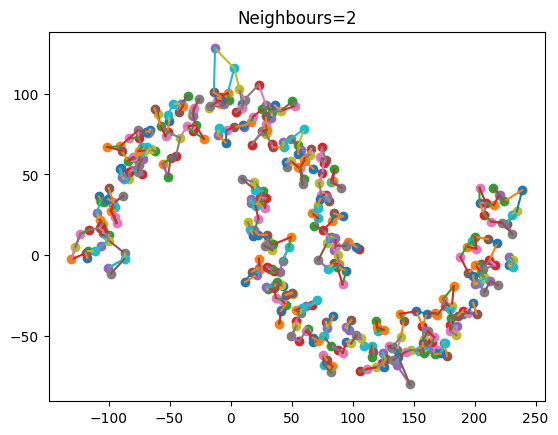

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


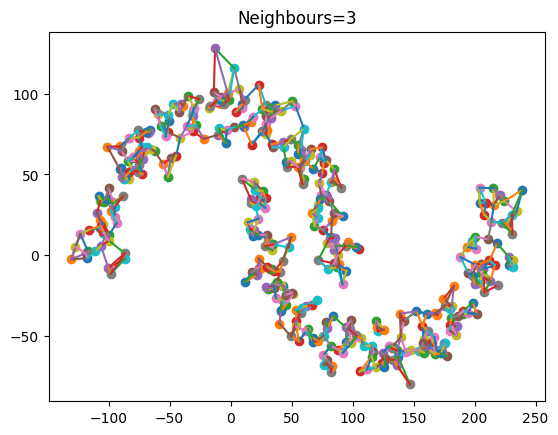

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


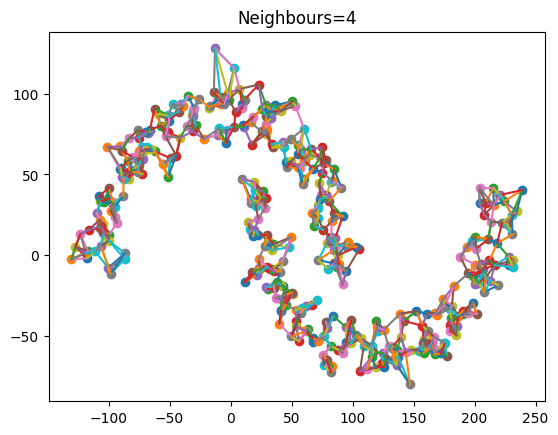

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


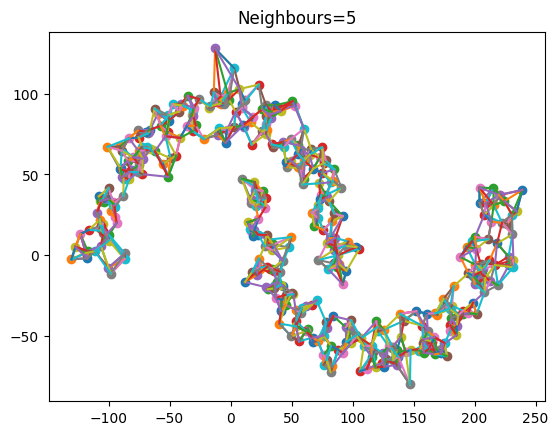

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


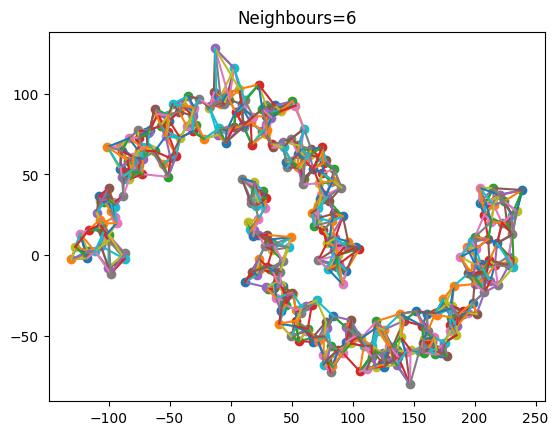

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


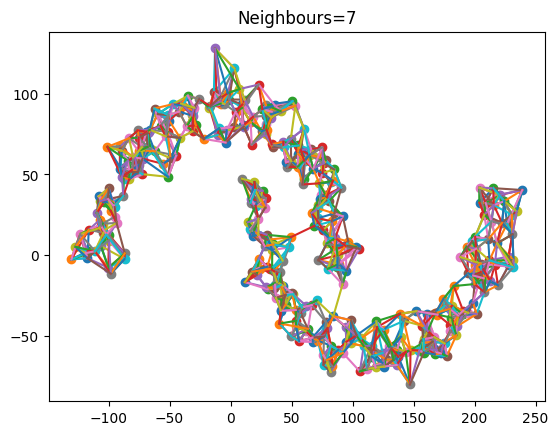

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_pred_kmeans = []
for k in k_values:
  G = build_graph(k,x)
  y_kmeans = kmeans_spectral_clustering(G,x)
  y_pred_kmeans.append(y_kmeans)

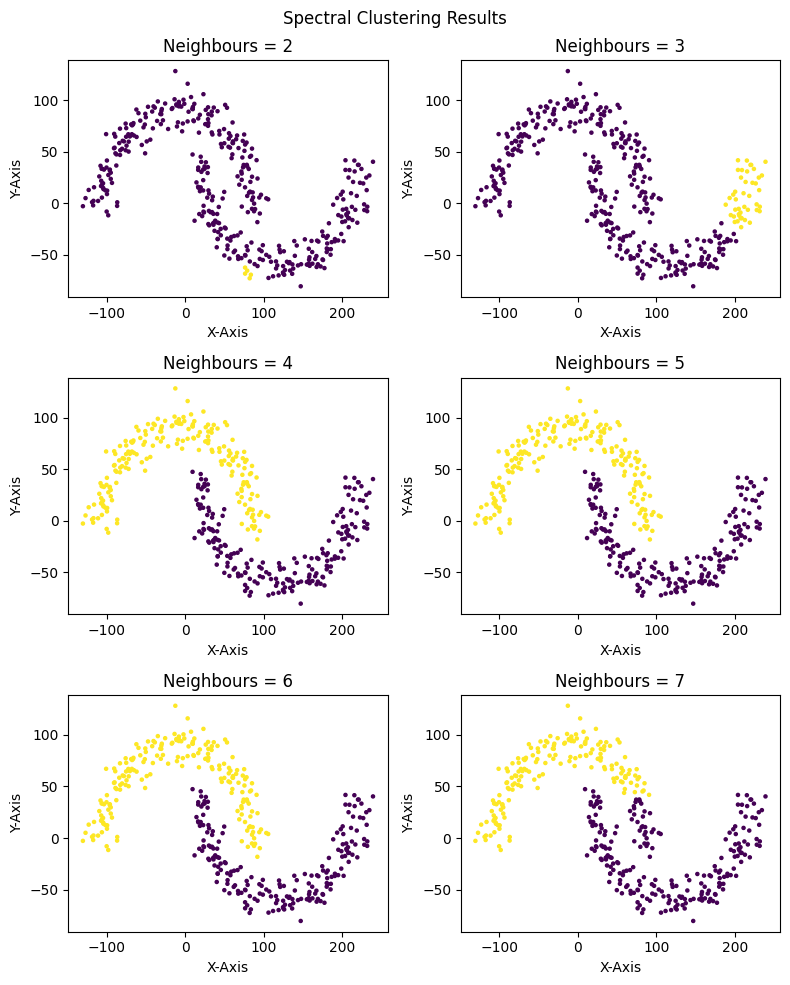

In [ ]:
r = math.ceil(len(k_values)) # To determine the number of rows in axes
fig, axes = plt.subplots(r//2, 2, figsize=(8, 10))
fig.suptitle("Spectral Clustering Results")

# Iterate through different values of k
for i, j in enumerate(k_values):
    row = i // 2  # Determine the row of the subplot
    col = i % 2   # Determine the column of the subplot

   # Scatter plot the data points with colors representing clusters
    ax = axes[row, col]
    ax.scatter(x[:, 0], x[:, 1], c=y_pred_kmeans[i], cmap='viridis', s=5)
    ax.set_title(f'Neighbours = {j}')
    ax.set_xlabel('X-Axis')
    ax.set_ylabel('Y-Axis')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
